In [5]:
%pip install tensorflow  numpy 




     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 6.7 MB/s eta 0:00:57
   ---------------------------------------- 0.6/377.0 MB 7.0 MB/s eta 0:00:54
   ---------------------------------------- 1.1/377.0 MB 9.1 MB/s eta 0:00:42
   ---------------------------------------- 1.7/377.0 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 2.0/377.0 MB 9.9 MB/s eta 0:00:38
   ---------------------------------------- 2.5/377.0 MB 9.9 MB/s eta 0:00:38
   ---------------------------------------- 3.1/377.0 MB 9.8 MB/s eta 0:00:38
   ---------------------------------------- 3.7/377.0 MB 10.2 MB/s eta 0:00:3

Processing the CIFAR-10 Dataset

In [8]:
import numpy as np
from tensorflow.keras import datasets, utils

In [10]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
NUM_CLASSES = 10

X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


Create a Sequential model

In [17]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\Research\OReilly-Codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [20]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Training the model

In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.2923 - loss: 1.9533 - val_accuracy: 0.3857 - val_loss: 1.7108
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3932 - loss: 1.6936 - val_accuracy: 0.4063 - val_loss: 1.6718
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4318 - loss: 1.5947 - val_accuracy: 0.4471 - val_loss: 1.5437
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4507 - loss: 1.5421 - val_accuracy: 0.4545 - val_loss: 1.5352
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4641 - loss: 1.4934 - val_accuracy: 0.4625 - val_loss: 1.5061
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.4782 - loss: 1.4579 - val_accuracy: 0.4556 - val_loss: 1.5165
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4898 - loss: 1.4328 - val_accuracy: 0.4797 - val_loss: 1.4581
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4980 -

Evaluating the model

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4988 - loss: 1.4140


[1.4248257875442505, 0.49720001220703125]

Displaying the predictions of the MLP against the actual labels 

In [30]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


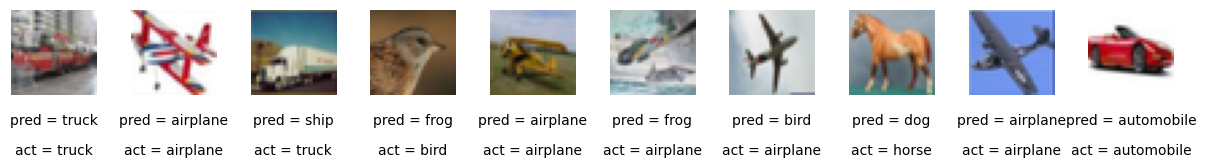

In [32]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)
fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]),fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]),fontsize=10, ha='center' , transform=ax.transAxes)

    ax.imshow(img)

Building Convolutional Neural Networks Using Batch Normalization and Dropout layers

In [49]:
from tensorflow.keras import layers, models

input_layer = layers.Input((32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x= layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x= layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x= layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x= layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(input_layer, output_layer)

In [50]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_37 (LeakyReLU)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_38 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

Complie the CNN Model

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the CNN Model

In [54]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.8810 - loss: 0.3376 - val_accuracy: 0.7415 - val_loss: 0.8733
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.8922 - loss: 0.3079 - val_accuracy: 0.7503 - val_loss: 0.8654
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9024 - loss: 0.2768 - val_accuracy: 0.7394 - val_loss: 0.9157
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.9086 - loss: 0.2587 - val_accuracy: 0.7278 - val_loss: 1.0196
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9118 - loss: 0.2451 - val_accuracy: 0.7316 - val_loss: 1.0145
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.9204 - loss: 0.2273 - val_accuracy: 0.7481 - val_loss: 1.0094
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.9284 - loss: 0.2075 - val_accuracy: 0.7278 - val_loss: 1.0691
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9312 -

In [55]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7344 - loss: 1.2486


[1.2345889806747437, 0.7336999773979187]

In [56]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


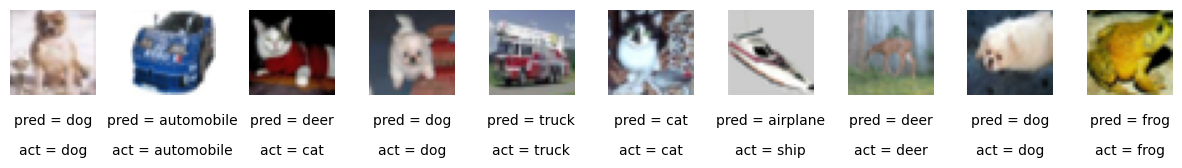

In [57]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)
fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]),fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]),fontsize=10, ha='center' , transform=ax.transAxes)

    ax.imshow(img)